In [1]:
import os
import sys

# Assume the current working directory is where this notebook file is located 
project_dir = os.path.dirname(os.getcwd())
if project_dir not in sys.path:
    sys.path.append(os.path.join(project_dir, "src"))
# Alternatively you can install package directly from the Pypi. 
# %pip install im2im

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def hist(data, title, interval=0.1):
    bins = np.arange(0, max(data) + interval, interval)
    n, bins, patches = plt.hist(data, bins=bins, alpha=0.7)
    for patch in patches:
        height = patch.get_height()
        plt.annotate(f'{int(height)}',
                     (patch.get_x() + patch.get_width() / 2, height),
                     textcoords="offset points",
                     xytext=(0,5),
                     ha='center')
    plt.title(title)
    plt.xlabel('Execution Time (s)')
    plt.xticks(bins)
    plt.ylabel('Number')
    plt.show()

In [3]:
from im2im import _constructor

kg = _constructor.knowledge_graph
print(kg)

2024-04-10 15:39:09.279506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 15:39:10.172312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Knowledge Graph with 553 nodes and 6472 edges.


In [4]:
%pip install py-cpuinfo
%pip install gputil
import cpuinfo
import GPUtil

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz
GPU:0: NVIDIA GeForce GTX 1080 Ti


2024-04-10 15:39:18.732732: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 15:39:18.733895: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 15:39:18.734250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 15:39:18.735622: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 15:39:18.736011: I external/local_xla/xla/stream_executor

Image Size is (128, 128)
Execution time from 1.9999997675768099e-07 to 0.002502927400018962


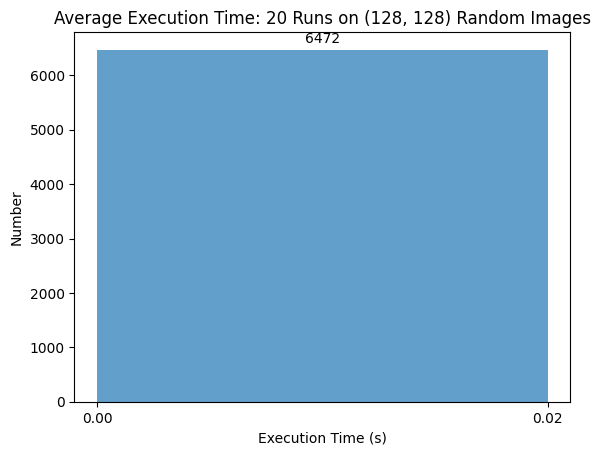

Image Size is (256, 256)
Execution time from 2.0500001483014784e-07 to 0.0027868179499819234


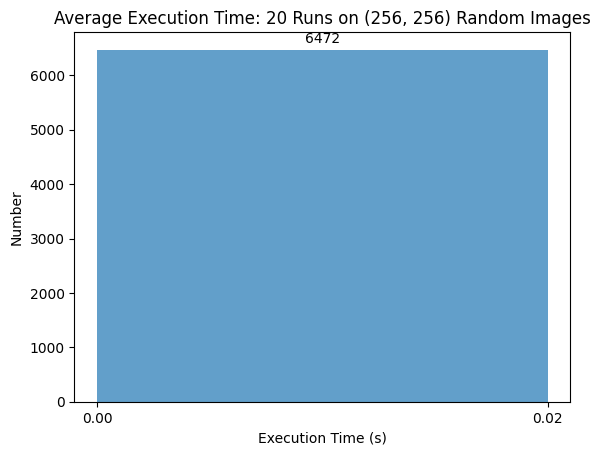

Image Size is (512, 512)
Execution time from 2.0999996195314452e-07 to 0.010803471399958653


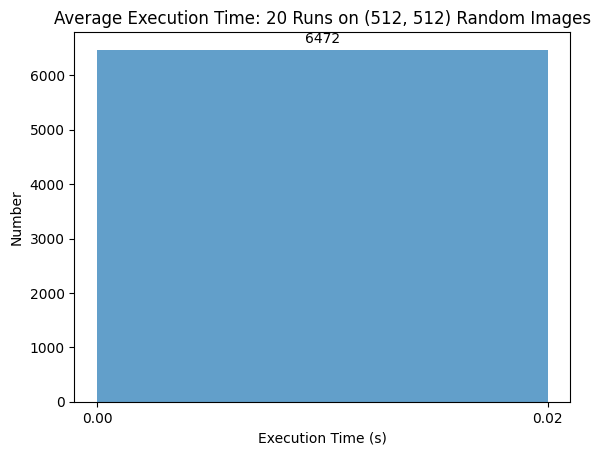

Image Size is (1024, 1024)
Execution time from 2.3000002329354175e-07 to 0.05030013665000297


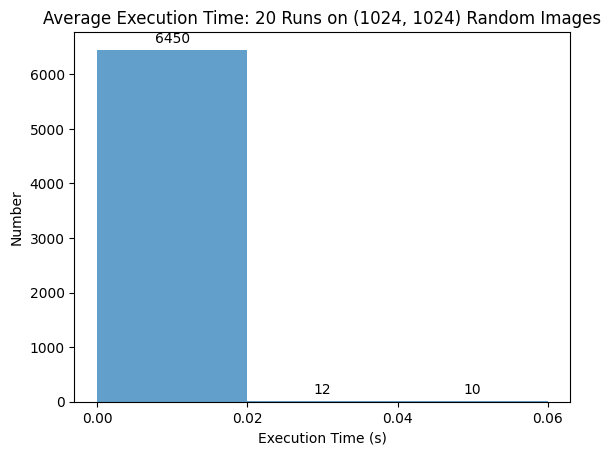

Image Size is (2048, 2048)
Execution time from 2.3500006136600858e-07 to 0.18002753470000243


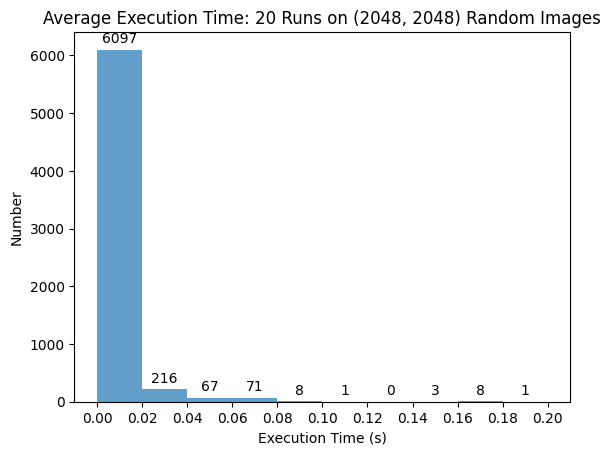

In [5]:
from im2im import time_cost_in_kg

cpu_name = cpuinfo.get_cpu_info()['brand_raw']
print(f"CPU: {cpu_name}")

gpus = GPUtil.getGPUs()
print(f"GPU:0: {GPUtil.getGPUs()[0].name}")

repeat_count = 20
for img_size in [(128, 128), (256, 256), (512, 512), (1024, 1024), (2048, 2048)]:
    time_costs = time_cost_in_kg(kg, img_size, repeat_count)

    print(f'Image Size is {img_size}')
    print(f'Execution time from {min(time_costs.values())} to {max(time_costs.values())}')
    
    hist(time_costs.values(), f"Average Execution Time: {repeat_count} Runs on {img_size} Random Images", 0.02)